# Test Robustness of Slice Selection

This code measures the PM cross-sectional area in each T and Z slice and plots the measurements as a heatmap to find out how robust the automatic slice selection of the quantification pipeline is. 

### Install Packages

In [1]:
%%bash
pip install --upgrade pip -q && pip install matplotlib numpy==1.26.4 pydicom scikit-image opencv-python-headless -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dxdata 0.41.0 requires networkx==2.8.8; python_version >= "3.8", but you have networkx 3.4.2 which is incompatible.
dxdata 0.41.0 requires numpy==1.23.5; python_version >= "3.8", but you have numpy 1.26.4 which is incompatible.


## Plot PM Areas over Z and T Slices

In [ ]:
import pandas as pd

from ukb_functions import read_dicom, read_and_segment_dicoms
from pm_test_robustness import *

fabry_df = pd.read_csv('/opt/notebooks/fabry_table.csv')
fabry_ids = fabry_df['Participant ID'].to_list()

## !! the participant IDs are randomized for each project, so select your own template and crop it manually
template = read_dicom('/mnt/project/Bulk/Heart MRI/Short axis/10/1000659_20209_2_0.zip', print_output=False)
template = template[75:120, 50:95, :, :]

In [ ]:
# get selected slices

fabry_paths = ['/mnt/project/Bulk/Heart MRI/Short axis/'+str(f)[:2]+'/'+str(f)+'_20209_2_0.zip' for f in fabry_ids]

_, _, _, selected_slices = read_and_segment_dicoms(fabry_paths, tdim=2, template=template[:, :, 4, :], print_output=True, show_images=False, return_slices=True)

print('\nselected_slices:', selected_slices)

18 archive(s) found.
Processing complete.           

selected_slices: [[4, 46], [4, 46], [4, 44], [4, 48], [4, 43], [4, 47], [4, 45], [4, 47], [4, 44], [4, 47], [4, 40], [4, 48], [4, 48], [4, 0], [4, 46], [4, 45], [4, 49], [4, 0]]


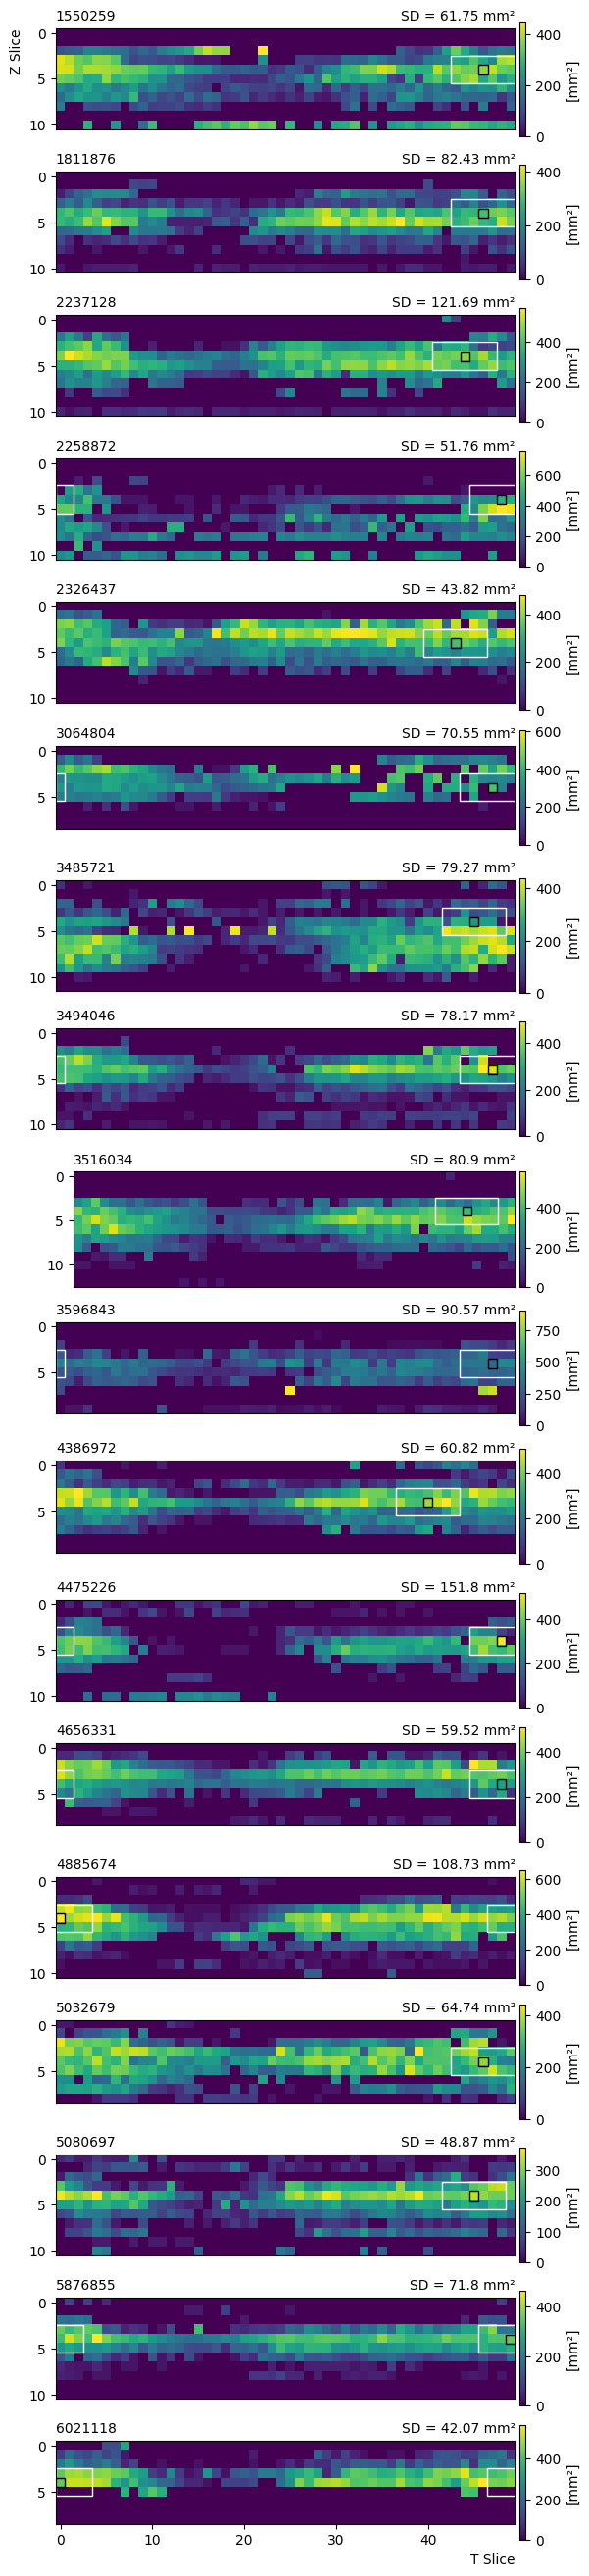

In [ ]:
# plot PM areas over slices for 

test_pm_robustness(fabry_ids, template, selected_slices=selected_slices)

## note: 0 values sorted out for SD calculation

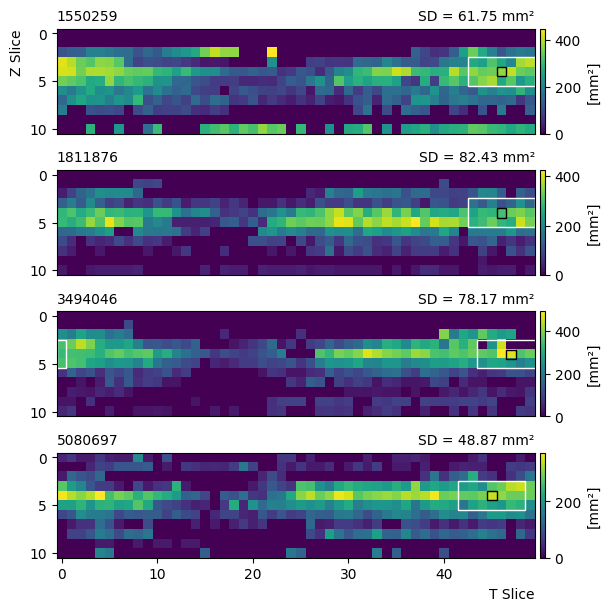

In [ ]:
# plot only selected scans

indices = [0, 1, 7, 15]
_ids = [f for i, f in enumerate(fabry_ids) if i in indices]
_slices = [s for i, s in enumerate(selected_slices) if i in indices]

test_pm_robustness(_ids, template, selected_slices=_slices)